# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:
df = pd.read_csv('../data/states_edu.csv')
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df['ENROLL'] = imputer.fit_transform(df[['ENROLL']])
df['TOTAL_REVENUE'] = imputer.fit_transform(df[['TOTAL_REVENUE']])
df['FEDERAL_REVENUE'] = imputer.fit_transform(df[['FEDERAL_REVENUE']])
df['STATE_REVENUE'] = imputer.fit_transform(df[['STATE_REVENUE']])
df['LOCAL_REVENUE'] = imputer.fit_transform(df[['LOCAL_REVENUE']])
df['TOTAL_REVENUE'] = imputer.fit_transform(df[['TOTAL_REVENUE']])
df['TOTAL_EXPENDITURE'] = imputer.fit_transform(df[['TOTAL_EXPENDITURE']])
df['INSTRUCTION_EXPENDITURE'] = imputer.fit_transform(df[['INSTRUCTION_EXPENDITURE']])
df['SUPPORT_SERVICES_EXPENDITURE'] = imputer.fit_transform(df[['SUPPORT_SERVICES_EXPENDITURE']])
df['CAPITAL_OUTLAY_EXPENDITURE'] = imputer.fit_transform(df[['CAPITAL_OUTLAY_EXPENDITURE']])
df['GRADES_KG_G'] = imputer.fit_transform(df[['GRADES_KG_G']])
df['GRADES_4_G'] = imputer.fit_transform(df[['GRADES_4_G']])
df['GRADES_8_G'] = imputer.fit_transform(df[['GRADES_8_G']])
df['GRADES_12_G'] = imputer.fit_transform(df[['GRADES_12_G']])
df['GRADES_1_8_G'] = imputer.fit_transform(df[['GRADES_1_8_G']])
df['GRADES_9_12_G'] = imputer.fit_transform(df[['GRADES_9_12_G']])
df['GRADES_ALL_G'] = imputer.fit_transform(df[['GRADES_ALL_G']])
df['AVG_MATH_4_SCORE'] = imputer.fit_transform(df[['AVG_MATH_4_SCORE']])
df['AVG_MATH_4_SCORE'] = imputer.fit_transform(df[['AVG_MATH_4_SCORE']])
df['AVG_MATH_8_SCORE'] = imputer.fit_transform(df[['AVG_MATH_8_SCORE']])
df['AVG_READING_4_SCORE'] = imputer.fit_transform(df[['AVG_READING_4_SCORE']])
df['AVG_READING_8_SCORE'] = imputer.fit_transform(df[['AVG_READING_8_SCORE']])
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.566176,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,577954.717647,282069.084967,731634.0,208.000000,252.000000,207.000000,263.558719
1,1992_ALASKA,ALASKA,1992,917541.566176,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,577954.717647,282069.084967,122487.0,236.327434,278.280731,218.806154,263.558719
2,1992_ARIZONA,ARIZONA,1992,917541.566176,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,577954.717647,282069.084967,673477.0,215.000000,265.000000,209.000000,263.558719
3,1992_ARKANSAS,ARKANSAS,1992,917541.566176,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,577954.717647,282069.084967,441490.0,210.000000,256.000000,211.000000,263.558719
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.566176,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,577954.717647,282069.084967,5254844.0,208.000000,261.000000,202.000000,263.558719


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [13]:
years_of_data = df['YEAR'].nunique()
print(years_of_data)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [14]:
michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_READING_4_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_READING_4_SCORE'].mean()

print(f"Michigan Average: {michigan_avg}")
print(f"Ohio Average: {ohio_avg}")

if michigan_avg > ohio_avg:
    print("Michigan has a higher average than Ohio in Grade 4 Reading.")
elif ohio_avg > michigan_avg:
    print("Ohio has a higher average than Michigan in Grade 4 Reading.")
else:
    print("Michigan and Ohio have the same average in Grade 4 Reading.")

Michigan Average: 218.4524009324009
Ohio Average: 220.26470862470862
Ohio has a higher average than Michigan in Grade 4 Reading.


Find the average for your chosen test across all states in 2019

In [15]:
average_reading_4_score_2019 = df[df['YEAR'] == 2019]['AVG_READING_4_SCORE'].mean()
print(f"Average Grade 4 Reading Score in 2019: {average_reading_4_score_2019}")

Average Grade 4 Reading Score in 2019: 219.79245283018867


For each state, find a maximum value for your chosen test score

In [16]:
max_reading_scores = df.groupby('STATE')['AVG_READING_4_SCORE'].max()
print(max_reading_scores)

STATE
ALABAMA                 220.000000
ALASKA                  218.806154
ARIZONA                 218.806154
ARKANSAS                219.000000
CALIFORNIA              218.806154
COLORADO                227.000000
CONNECTICUT             230.000000
DELAWARE                226.000000
DISTRICT_OF_COLUMBIA    218.806154
DODEA                   235.000000
FLORIDA                 228.000000
GEORGIA                 222.000000
HAWAII                  218.806154
IDAHO                   223.000000
ILLINOIS                222.000000
INDIANA                 227.000000
IOWA                    225.000000
KANSAS                  225.000000
KENTUCKY                228.000000
LOUISIANA               218.806154
MAINE                   228.000000
MARYLAND                232.000000
MASSACHUSETTS           237.000000
MICHIGAN                220.000000
MINNESOTA               227.000000
MISSISSIPPI             219.000000
MISSOURI                224.000000
MONTANA                 227.000000
NATIONAL      

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [17]:
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['GRADES_4_G']

Feature engineering justification: **I created an expenditure_per_student feature because I believe the amount of money a state spends on academics greatly affects a students success**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

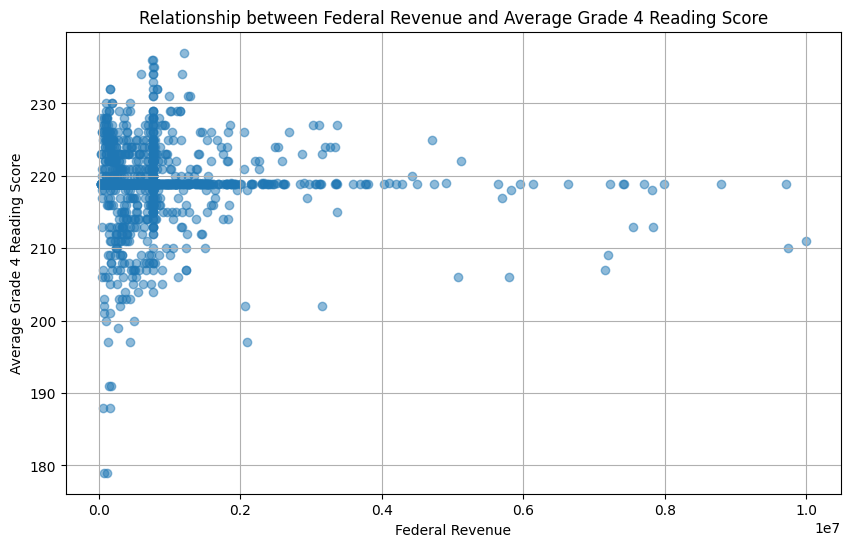

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['FEDERAL_REVENUE'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.title('Relationship between Federal Revenue and Average Grade 4 Reading Score')
plt.xlabel('Federal Revenue')
plt.ylabel('Average Grade 4 Reading Score')
plt.grid(True)
plt.show()

**There does not seem to be much of a correlation between Federal Revenue and Average Grade 4 Reading Score.**

**Visualization 2**

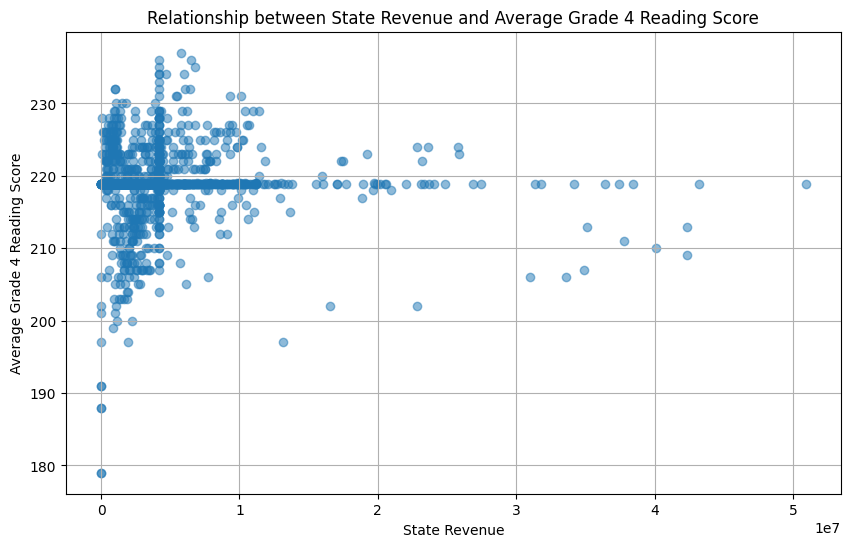

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['STATE_REVENUE'], df['AVG_READING_4_SCORE'], alpha=0.5)
plt.title('Relationship between State Revenue and Average Grade 4 Reading Score')
plt.xlabel('State Revenue')
plt.ylabel('Average Grade 4 Reading Score')
plt.grid(True)
plt.show()

**Similar to the previous comparision, there also seems to be not much of a correlation between State Revenue and Average Grade 4 Reading Score.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df['FEDERAL_REVENUE'].values.reshape(-1, 1)
y = df['AVG_READING_4_SCORE'].values.reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [23]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [24]:
# create your model here
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 18.840197334138796
R-squared: -0.014216129920958887


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

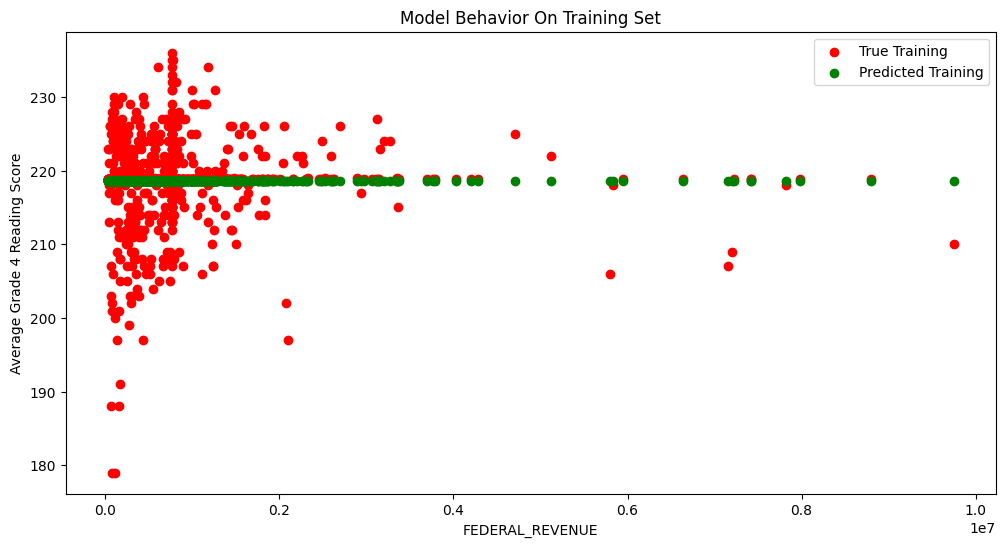

In [28]:
col_name = 'FEDERAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Reading Score')
plt.title("Model Behavior On Training Set")


Text(0.5, 1.0, 'Model Behavior on Testing Set')

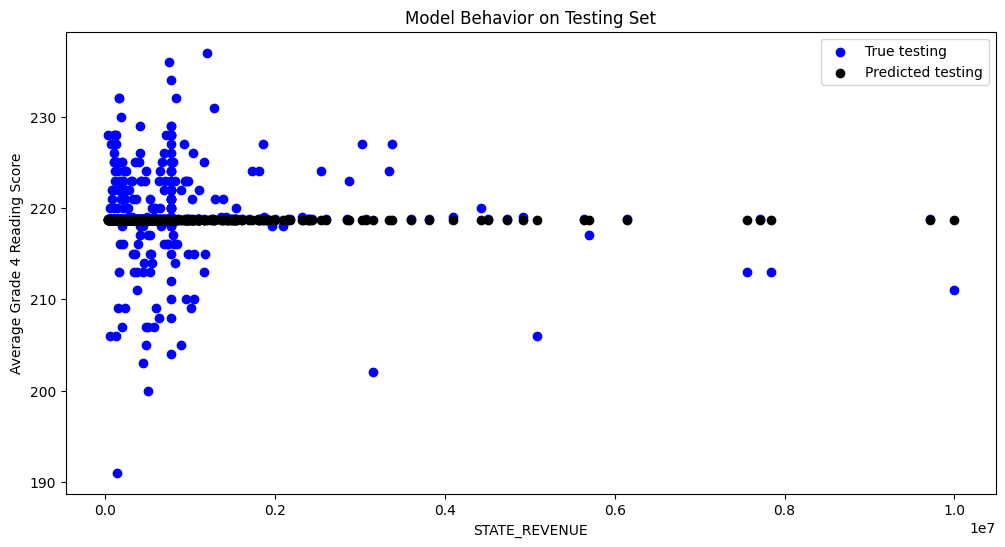

In [29]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Reading Score')
plt.title("Model Behavior on Testing Set")